### Домашнее задание

Задание по визуализиации на python * Используя данные об объектах недвижимости на сайте "наш.дом.рф" или cian.ru, провести мини-исследование рынка строящейся/готовой недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов. Идеи для мини-исследования * Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены. * Рассчитать объемы вводимого жилья по регионам и по годам. * Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах. * Визуализировать разброс, связь, доли, распределение этих показателей по регионам. * Сделать выводы по каждому из расчетов и графиков

Анализ будем проводить на предоставленном преподавателем датафрейме с сайта наш.дом.рф, т.к. самостоятельно спарсить данные не вышло

In [6]:
# устанавливаем недостающие библиотеки в нашем виртульаном окружении
#!pip install matplotlib
#!pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline

In [3]:
df = pd.read_pickle('df_nashdomrf.pkl')
df.head()

,id,hobjId,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,...,metro.time,metro.isWalk,metro.colors,complexShortNm,airQualityIndexValue,greenAreaIndexValue,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
0,13399,34754,28141,72,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13397,37201,28141,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13383,39024,28105,72,"г Тюмень, ул Профсоюзная, д. 56",4,20,68,2023-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13398,37165,28141,72,"г Тюмень, ул Профсоюзная, д. 56",7,10,43,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13391,37219,28101,72,"г Тюмень, ул Профсоюзная, д. 56",3,12,44,2023-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,id,hobjId,pdId,region,floorMin,floorMax,objElemLivingCnt,objElemParkingCnt,objSquareLiving,objCompensFundFlg,...,quartography.objLivElem3KCnt,quartography.objLivElem4KCnt,quartography.objLivElemCnt,quartography.objLivElemEntrCnt,quartography.objLivElemEntrFloorAvg,transportDistIndexValue,metro.time,airQualityIndexValue,greenAreaIndexValue,developer.bankruptStage.bankruptStageCd
count,11714.000000,1.171400e+04,11714.000000,11714.000000,11714.000000,11714.000000,11714.000000,11714.000000,11714.000000,11714.000000,...,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,2159.000000,1726.000000,543.000000,1450.000000,39.000000
mean,47201.561038,1.214296e+05,593421.548062,47.143930,10.098600,12.319020,187.375363,39.123869,9234.094460,0.032440,...,27.909452,3.583325,212.785458,2.990790,7.390208,4.850394,18.263654,7.261510,5.038621,5.179487
std,9164.260819,3.925233e+04,196913.969476,23.541737,7.550355,8.373724,232.802605,116.778193,11181.950546,0.177173,...,45.847425,15.688872,236.941815,3.583354,4.602278,2.803800,7.966119,1.593845,2.866219,0.996620
min,203.000000,3.680000e+02,172.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.266667,6.000000,1.000000,4.000000
25%,44840.250000,1.254072e+05,531395.000000,25.000000,4.000000,5.000000,37.250000,0.000000,2057.875000,0.000000,...,0.000000,0.000000,64.000000,1.000000,5.000000,2.000000,12.650000,6.000000,2.000000,4.000000
50%,49544.500000,1.301770e+05,647033.000000,50.000000,9.000000,11.000000,120.000000,0.000000,6230.715000,0.000000,...,15.000000,0.000000,144.000000,2.000000,7.000000,5.000000,17.775000,6.000000,5.000000,6.000000
75%,53234.750000,1.338758e+05,731622.000000,68.000000,15.000000,18.000000,248.750000,0.000000,12366.050000,0.000000,...,35.000000,0.000000,272.000000,3.000000,9.500000,7.000000,23.083333,8.000000,8.000000,6.000000
max,56378.000000,2.113298e+06,805258.000000,93.000000,75.000000,91.000000,2676.000000,3580.000000,142978.700000,1.000000,...,773.000000,439.000000,2676.000000,56.000000,240.000000,10.000000,40.383333,10.000000,10.000000,6.000000


In [5]:
df['year'] = df['objReady100PercDt'].apply(lambda x: int(x[:4]))

In [8]:
# Добавим текстовое название регионов с помощью файла соответствия кода региона и названия
reg_map = pd.read_excel('region_mapping.xlsx')
reg_map


,code,region_name
0,1,Республика Адыгея
1,2,Республика Башкортостан
2,3,Республика Бурятия
3,4,Республика Алтай
4,5,Республика Дагестан
...,...,...
81,87,Чукотский автономный округ
82,89,Ямало-Ненецкий автономный округ
83,91,Республика Крым
84,92,г. Севастополь


#### Рассчитаем объемы вводимого жилья по регионам и по годам.

In [19]:
region_year = pd.DataFrame(df.groupby(['region','year']).id.count()).reset_index()
region_year['count_obj'] = region_year['id']
region_year = region_year.drop(axis=1, labels='id')
region_year

,region,year,count_obj
0,1,2023,3
1,1,2024,24
2,1,2025,29
3,1,2026,6
4,2,2023,25
...,...,...,...
459,92,2023,4
460,92,2024,11
461,92,2025,7
462,93,2024,2


In [20]:
region_year.describe()

,region,year,count_obj
count,464.000000,464.000000,464.000000
mean,44.159483,2025.696121,25.245690
std,23.763331,2.696351,47.385602
min,1.000000,2018.000000,1.000000
25%,25.000000,2024.000000,2.000000
50%,44.000000,2025.000000,8.000000
75%,63.000000,2027.000000,25.000000
max,93.000000,2039.000000,386.000000


In [21]:
region_year = region_year.merge(reg_map, how='left', left_on='region', right_on='code').drop(axis=1, labels='code')
region_year

,region,year,count_obj,region_name
0,1,2023,3,Республика Адыгея
1,1,2024,24,Республика Адыгея
2,1,2025,29,Республика Адыгея
3,1,2026,6,Республика Адыгея
4,2,2023,25,Республика Башкортостан
...,...,...,...,...
459,92,2023,4,г. Севастополь
460,92,2024,11,г. Севастополь
461,92,2025,7,г. Севастополь
462,93,2024,2,Донецкая Народная Республика


In [24]:
reg_year_pivot = region_year.pivot(index='region_name',columns=['year'], values='count_obj')
reg_year_pivot


year,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,...,2029,2030,2031,2032,2033,2034,2035,2036,2038,2039
region_name,,,,,,,,,,,,,,,,,,,,,
Алтайский край,NaN,NaN,NaN,NaN,NaN,12.0,32.0,41.0,21.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Амурская область,NaN,NaN,NaN,NaN,NaN,3.0,22.0,11.0,3.0,1.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Архангельская область,NaN,NaN,NaN,NaN,NaN,5.0,28.0,35.0,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Астраханская область,NaN,1.0,NaN,NaN,NaN,4.0,18.0,21.0,13.0,1.0,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,2.0,NaN,NaN
Белгородская область,NaN,NaN,NaN,NaN,NaN,8.0,29.0,14.0,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ямало-Ненецкий автономный округ,NaN,NaN,NaN,NaN,NaN,5.0,27.0,5.0,14.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ярославская область,NaN,NaN,NaN,NaN,NaN,13.0,43.0,40.0,12.0,1.0,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
г. Москва,NaN,NaN,NaN,1.0,NaN,164.0,331.0,235.0,120.0,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='year', ylabel='region_name'>

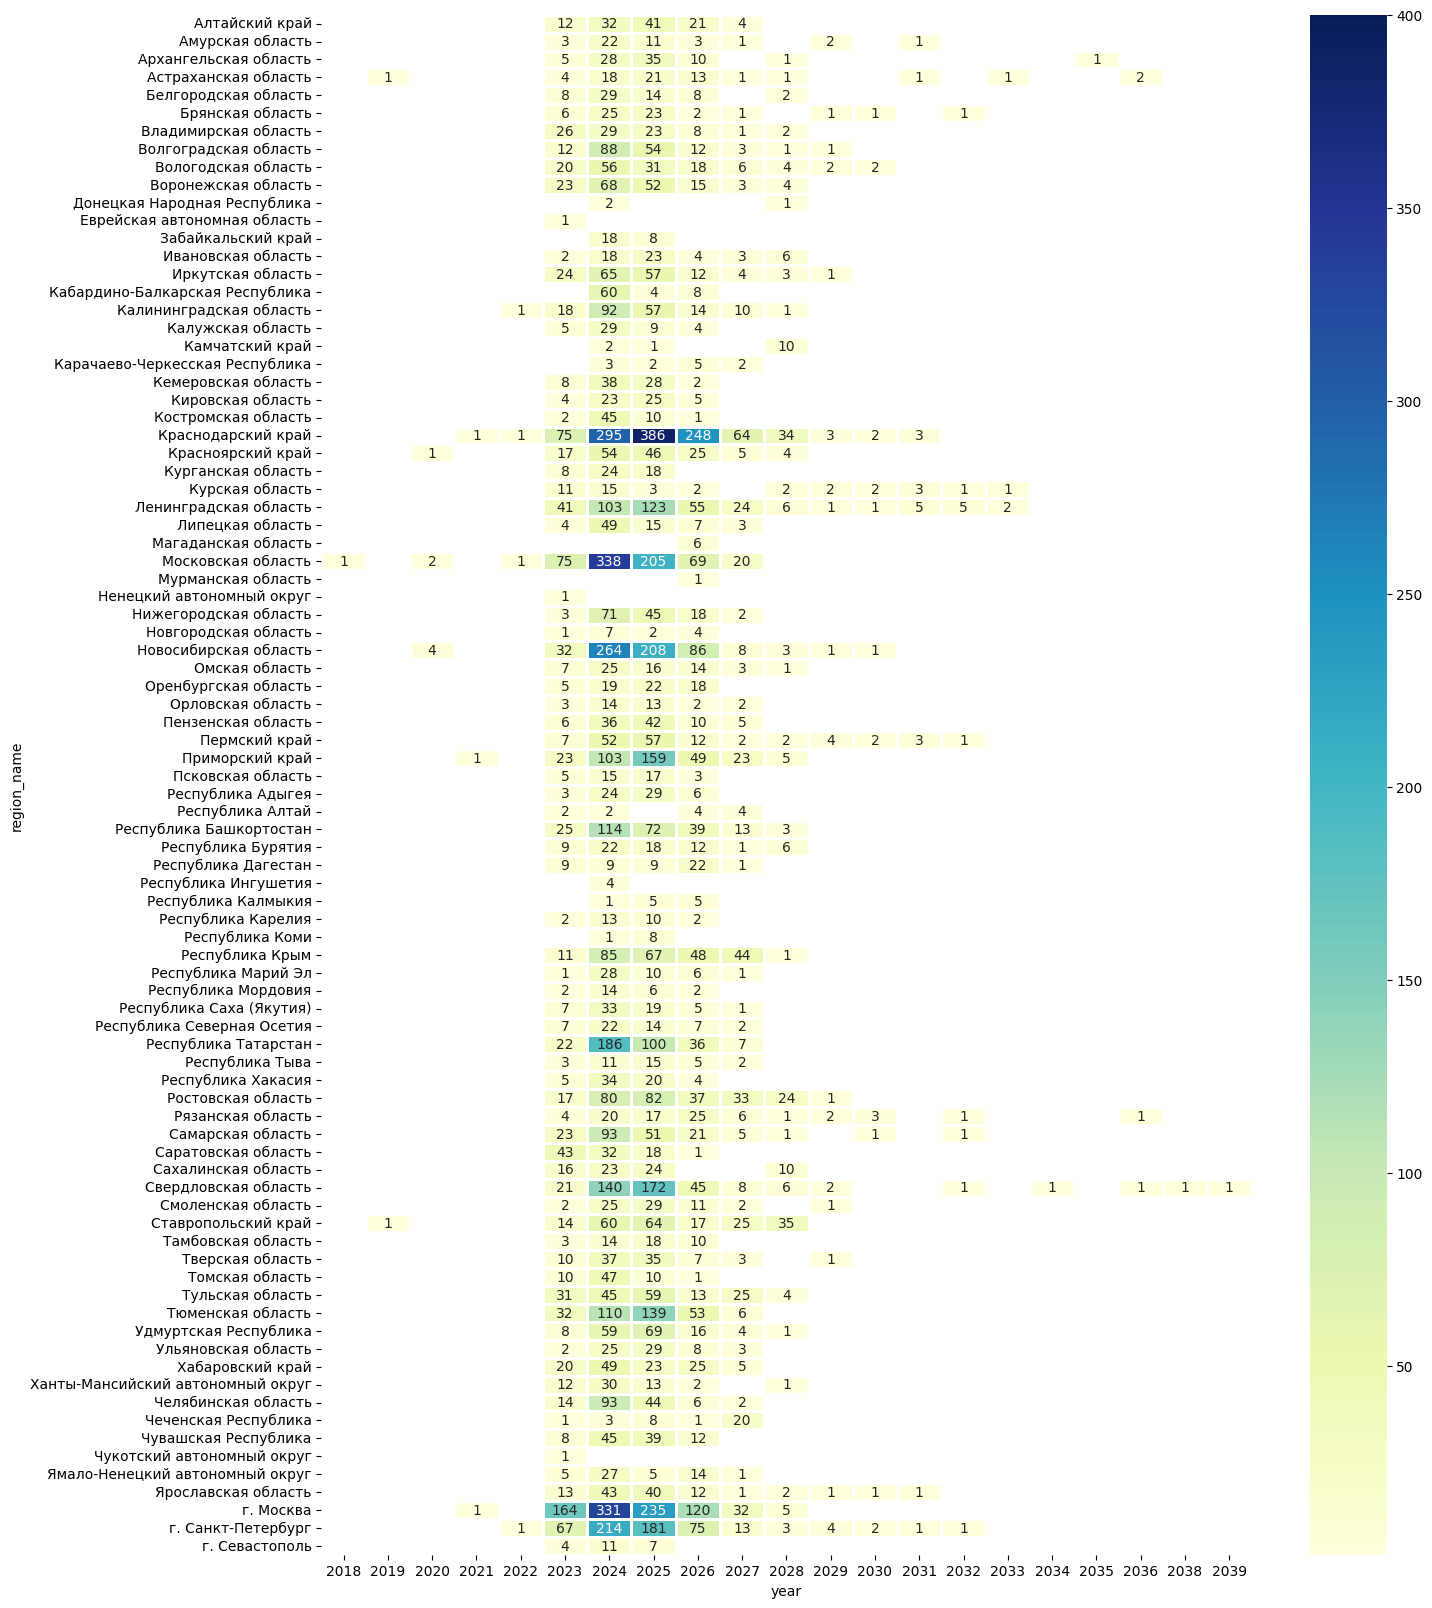

In [25]:
rcParams['figure.figsize'] = 15,20
sns.heatmap(
    reg_year_pivot,
    annot=True,
    fmt='.0f',
    linewidths=.9,
    robust=True,
    vmin=1,
    vmax=400,
    cmap="YlGnBu")


Больше всего объектов будет сдано в 2024-2025 году в Москве, Краснодарском крае и Московской области. Причем максимальное количество объектов (386 штук) будет сдано в Краснодарском крае в 2025 году!

#### Сравним этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в ТОП-10 регионах по количеству вводимых новостроек, т.е. регионы с наиболее активной застройкой

Кажется, что наиболее подходящей визуализацией для сравнения случайных величин будут боксплоты

objFloorCnt - этажность
objFlatCnt - квартиры, есть нули
objInfrstrObjPrkngCnt - количество парковок
objFlatSq - жилая площадь
objPriceAvg - стоимость квадратного метра

In [53]:
top_region = region_year.groupby(['region_name','region']).count_obj.sum().reset_index().sort_values(by='count_obj', ascending=False).reset_index()
top_region = top_region.iloc[0:10,1:]
top_region_list = top_region['region'].to_list()
top_region_list

[23, 77, 50, 54, 78, 66, 47, 25, 16, 72]

In [65]:
cols = ['region','objFloorCnt','objFlatCnt','objInfrstrObjPrkngCnt','objFlatSq','objPriceAvg']
top_region_chars = df.query('region in @top_region_list').loc[:,cols]
top_region_chars = top_region_chars.merge(reg_map, how='left', left_on='region', right_on='code').drop(axis=1, labels='code')
top_region_chars

,region,objFloorCnt,objFlatCnt,objInfrstrObjPrkngCnt,objFlatSq,objPriceAvg,region_name
0,72,1,0,0.0,0.0,50768.0,Тюменская область
1,72,12,65,11.0,6251.1,47163.0,Тюменская область
2,72,20,68,0.0,6423.85,67159.0,Тюменская область
3,72,10,43,4.0,4812.98,47886.0,Тюменская область
4,72,12,44,0.0,4343.9,62638.0,Тюменская область
...,...,...,...,...,...,...,...
5694,50,26,288,50.0,14870.4,85604.0,Московская область
5695,50,26,768,102.0,29620.1,181766.0,Московская область
5696,50,26,312,50.0,14788.8,85610.0,Московская область
5697,50,26,312,50.0,14872.8,85634.0,Московская область


In [66]:
top_region_chars.describe()

,region,objFloorCnt,objFlatCnt,objInfrstrObjPrkngCnt,objPriceAvg
count,5699.000000,5699.000000,5699.000000,5686.000000,3.829000e+03
mean,50.679593,12.949816,227.037200,58.981358,1.835402e+05
std,22.200453,9.637148,289.217515,107.399390,1.851301e+05
min,16.000000,0.000000,0.000000,0.000000,2.209000e+03
25%,23.000000,5.000000,12.000000,0.000000,1.056550e+05
50%,50.000000,11.000000,141.000000,20.000000,1.440000e+05
75%,77.000000,19.000000,314.500000,63.000000,2.014070e+05
max,78.000000,91.000000,2676.000000,914.000000,2.820739e+06


Text(29.382115912208526, 0.5, 'Количество этажей')

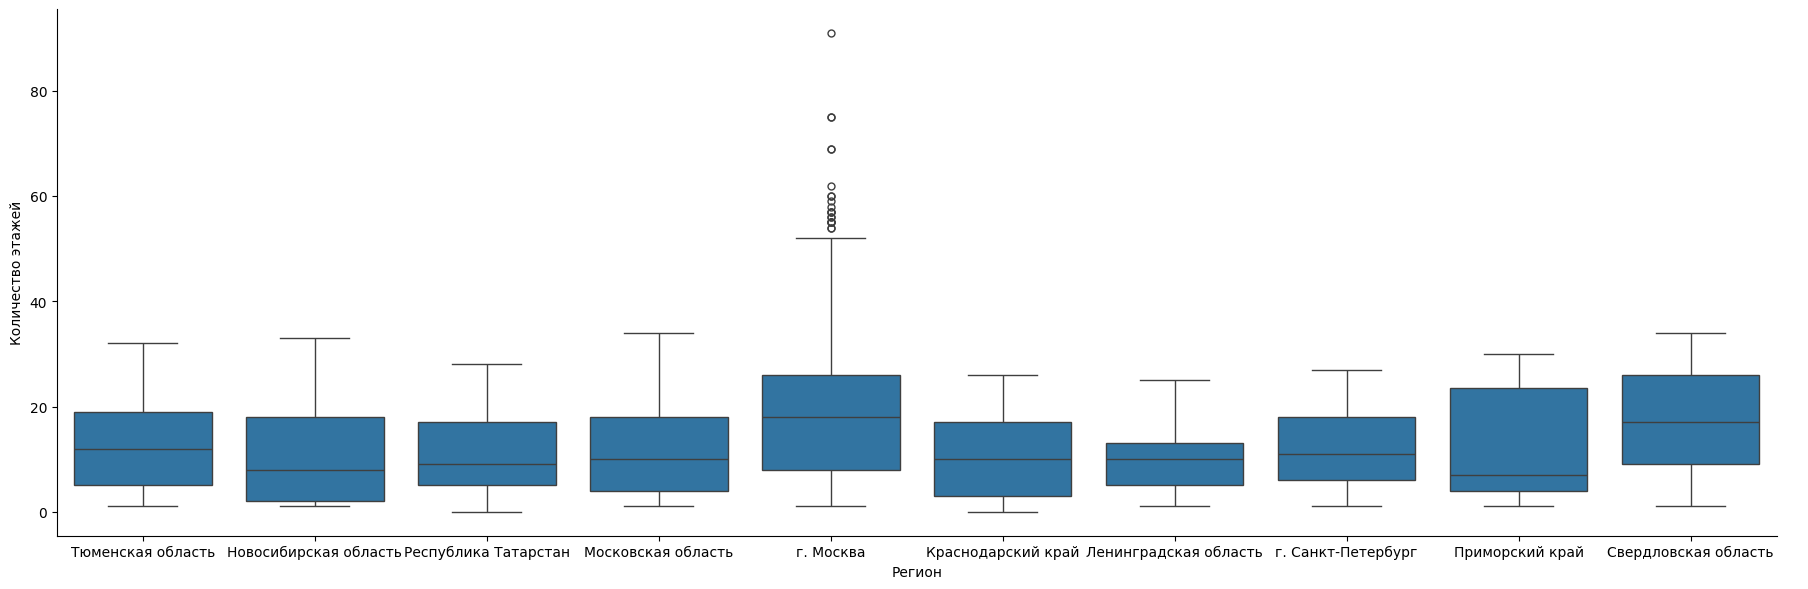

In [82]:
ax = sns.catplot(
    x='region_name',
    y='objFloorCnt',
    data=top_region_chars,
    kind='box',
    height=6,
    aspect=3
)
plt.xlabel('Регион', size= 10, weight= 500)
plt.ylabel('Количество этажей', size= 10, weight= 500)

Этажность новостроек примерно одинакова во всех рассматриваемых регионах, кроме Москвы. Только в Москве строятся настоящие небоскребы.

Text(29.49014060356653, 0.5, 'Количество квартир')

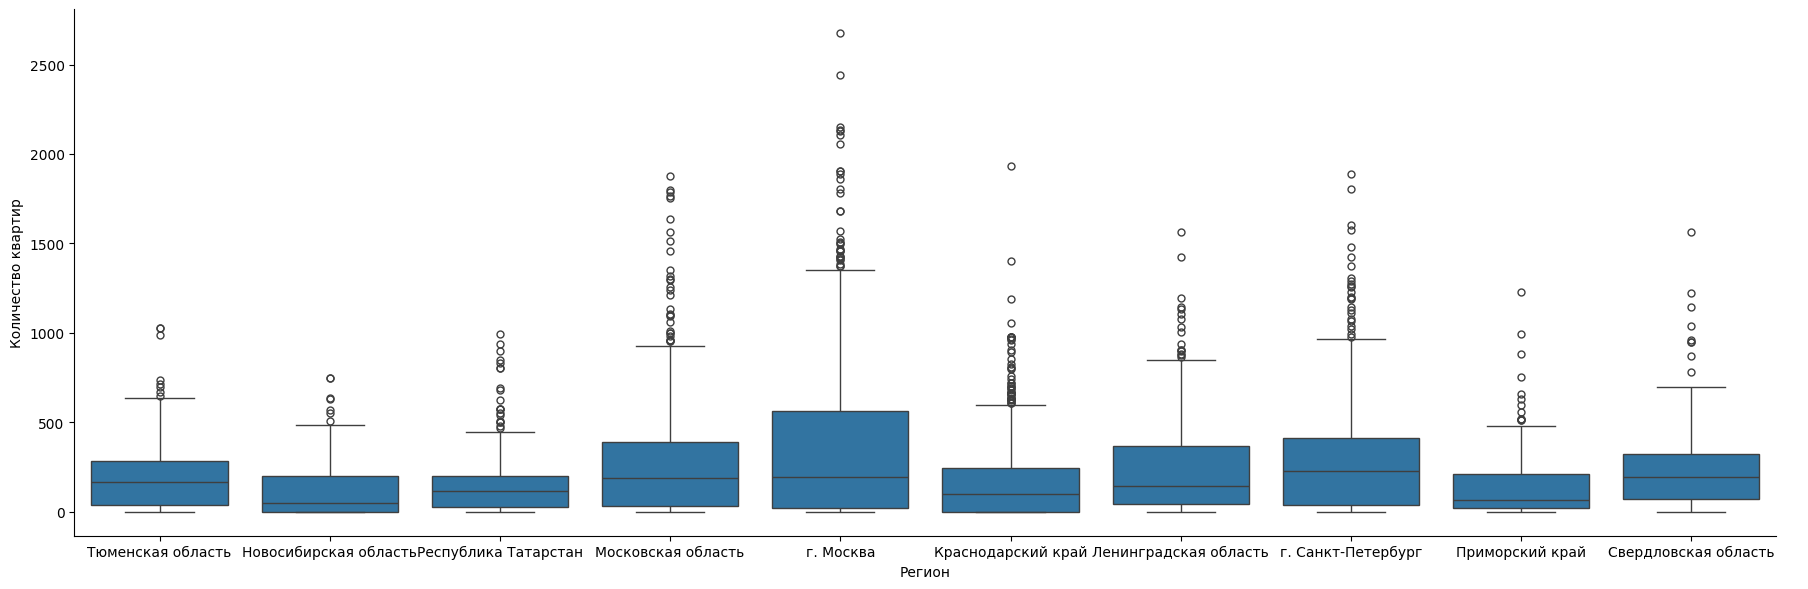

In [83]:
ax = sns.catplot(
    x='region_name',
    y='objFlatCnt',
    data=top_region_chars,
    kind='box',
    height=6,
    aspect=3
)
plt.xlabel('Регион', size= 10, weight= 500)
plt.ylabel('Количество квартир', size= 10, weight= 500)

Логично, что в Москве новостройки обладают наибольшим количеством квартир, т.к. и этажность выше, чем в других регионах. При этом в Московской области, Краснодарском крае и Санкт-Петербурге много выбросов с большим количеством квартир, вероятнее всего в новостройках этих регионов попросту больше подъездов, чем в других регионах со схожими параметрами этажности.

Text(29.436128257887525, 0.5, 'Количество парковочных мест')

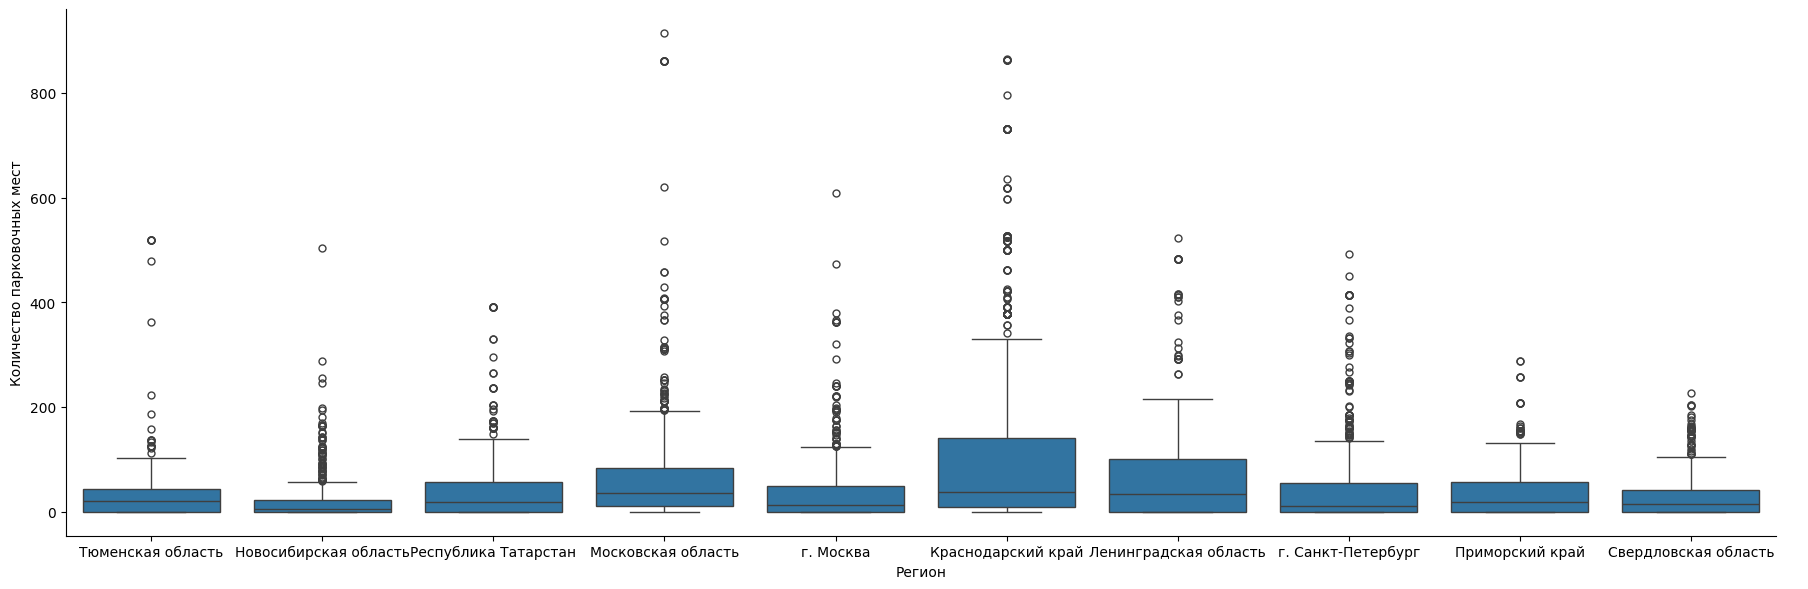

In [84]:
ax = sns.catplot(
    x='region_name',
    y='objInfrstrObjPrkngCnt',
    data=top_region_chars,
    kind='box',
    height=6,
    aspect=3
)
plt.xlabel('Регион', size= 10, weight= 500)
plt.ylabel('Количество парковочных мест', size= 10, weight= 500)

Несмотря на то, что в Москве больше всего количество квартир, а значит и будущих жителей, количество парковочных мест меньше, чем в том же Краснодарском крае, Московской области и Ленинградской области. Можно предположить, что в Москве могут быть проблемы с поиском парковочных мест в новостройках (что мы и наблюдаем, проживая в Москве)

Text(29.40912208504802, 0.5, 'Средняя стоимость кв.м.')

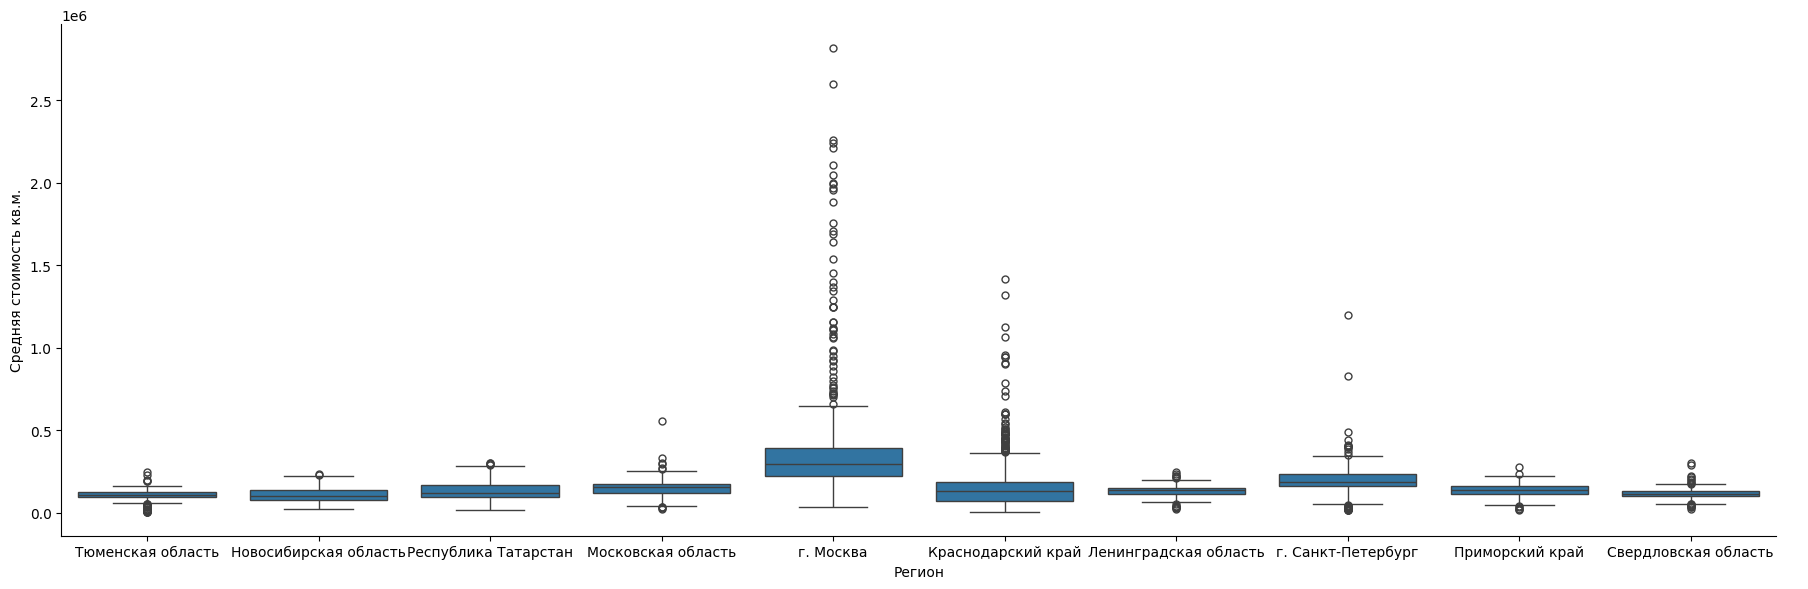

In [85]:
ax = sns.catplot(
    x='region_name',
    y='objPriceAvg',
    data=top_region_chars,
    kind='box',
    height=6,
    aspect=3
)
plt.xlabel('Регион', size= 10, weight= 500)
plt.ylabel('Средняя стоимость кв.м.', size= 10, weight= 500)

Ожидаемо, наибольшая стоимость за кв.м. жилья в новостройках нашей столицы. Причем очень много кейсов, где стоимость кв.м. превышает 1 млн руб.! 